In [1]:
#해당영화 시장 점유율과 누적 max관객수의 상관관계

In [126]:
import numpy as np
import pandas as pd 
import cx_Oracle as co 
from DbConn import *
import seaborn as sns 
import matplotlib.pyplot as plt

In [62]:
db=DbConn()

In [63]:
result=pd.read_sql("SELECT MOVIENM,AVG(SALESSHARE),MAX(AUDIACC) FROM BOXOFFICE GROUP BY MOVIENM",db.connection)
result

,MOVIENM,AVG(SALESSHARE),MAX(AUDIACC)
0,1987,17.793617,7201087
1,페르디난드,3.773333,512168
2,코코,10.894000,3501728
3,극장판 레이디버그: 미라클스톤의 비밀,0.775000,26133
4,"쏘아올린 불꽃, 밑에서 볼까? 옆에서 볼까?",0.700000,22051
5,패딩턴 2,2.752381,320132
6,골든슬럼버,12.628571,1369546
7,흥부: 글로 세상을 바꾼 자,3.825000,404649
8,궁합,13.390476,1333293
9,셰이프 오브 워터: 사랑의 모양,4.367857,485227


In [31]:
#회귀분석 


In [94]:
result2=pd.read_sql("SELECT AVG(SALESSHARE) FROM BOXOFFICE GROUP BY MOVIENM",db.connection)
result2

,AVG(SALESSHARE)
0,17.793617
1,3.773333
2,10.894000
3,0.775000
4,0.700000
5,2.752381
6,12.628571
7,3.825000
8,13.390476
9,4.367857


In [95]:
result3=pd.read_sql("SELECT MAX(AUDIACC) FROM BOXOFFICE GROUP BY MOVIENM",db.connection)
result3

,MAX(AUDIACC)
0,7201087
1,512168
2,3501728
3,26133
4,22051
5,320132
6,1369546
7,404649
8,1333293
9,485227


In [42]:
from statsmodels.formula.api import ols 

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [54]:
#variance_inflation_facto(result1,result2)
from statsmodels.formula.api import ols 

In [106]:
res= ols("result1[] ~ result3", data= result1).fit() 
res

In [107]:
fitted=res.predict(result1)

In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [120]:
result1=pd.read_sql("SELECT AVG(SALESSHARE) SALESSHARE  ,MAX(AUDIACC) AUDIACC FROM BOXOFFICE GROUP BY MOVIENM",db.connection)
result1

,SALESSHARE,AUDIACC
0,17.793617,7201087
1,3.773333,512168
2,10.894000,3501728
3,0.775000,26133
4,0.700000,22051
5,2.752381,320132
6,12.628571,1369546
7,3.825000,404649
8,13.390476,1333293
9,4.367857,485227


In [110]:
#상관관계 알아보기 
result1.corr()

,AVG(SALESSHARE),MAX(AUDIACC)
AVG(SALESSHARE),1.000000,0.797488
MAX(AUDIACC),0.797488,1.000000


In [121]:
#회귀분석 
res= ols("result1.SALESSHARE ~ result1.AUDIACC", data= result1).fit() 
res

In [124]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     result1.SALESSHARE   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     2698.
Date:                Thu, 05 Nov 2020   Prob (F-statistic):               0.00
Time:                        16:18:41   Log-Likelihood:                -4286.0
No. Observations:                1546   AIC:                             8576.
Df Residuals:                    1544   BIC:                             8587.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.6590      0.108     24.654      0.000       2.447       2.871
result1.AUDIACC  2.657e-06   5.12e-08     51.939      0.000    2.56e-06    2.76e-06
==============================================================================
Omnibus:                      286.406   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6825.347
Skew:                           0.057   Prob(JB):                         0.00
Kurtosis:                      13.293   Cond. No.                     2.31e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

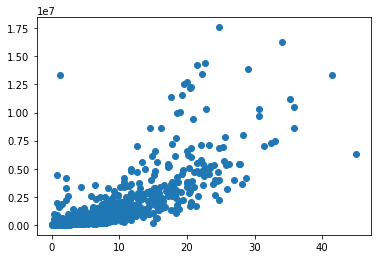

In [139]:
plt.scatter(result1.SALESSHARE,result1.AUDIACC)